In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/healthcare-dataset-stroke-data.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df['bmi'].fillna(df['bmi'].mean(),inplace=True)

In [5]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [6]:
df.drop('id',axis=1,inplace=True)

In [7]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


<Figure size 720x2880 with 0 Axes>

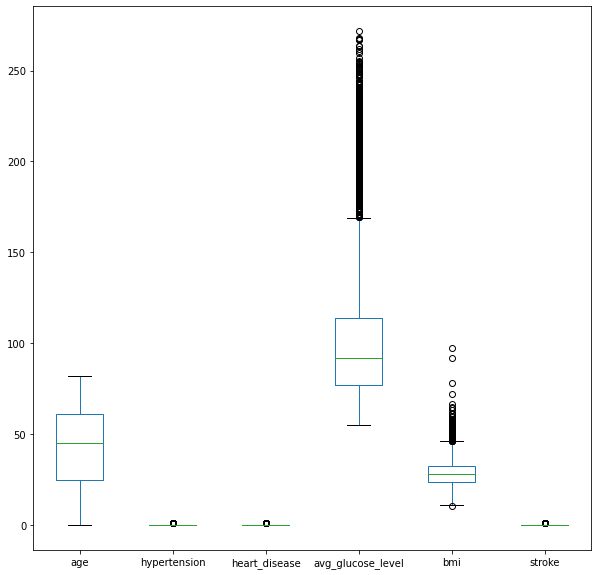

In [8]:
plt.figure(figsize=(10,40))
df.plot(kind='box',figsize=(10,10),)

In [9]:
df['avg_glucose_level'].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [10]:
df[df['avg_glucose_level']>114.00].value_counts()

gender  age    hypertension  heart_disease  ever_married  work_type  Residence_type  avg_glucose_level  bmi   smoking_status   stroke
Other   26.00  0             0              No            Private    Rural           143.33             22.4  formerly smoked  0         1
Female  50.00  0             0              Yes           Govt_job   Rural           124.45             24.6  never smoked     0         1
        57.00  1             0              No            Private    Rural           116.93             28.3  never smoked     0         1
                                            Yes           Private    Rural           129.54             60.9  smokes           0         1
                                                                                     235.85             40.1  never smoked     0         1
                                                                                                                                        ..
Male    35.00  0             0  

In [11]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [12]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
enc=LabelEncoder()

In [13]:
gender=enc.fit_transform(df['gender'])
work_type=enc.fit_transform(df['work_type'])
Residential_type=enc.fit_transform(df['Residence_type'])
avg_glucose_level=enc.fit_transform(df['avg_glucose_level'])
smoking_status=enc.fit_transform(df['smoking_status'])

In [14]:
smoking_status[:11]

array([1, 2, 2, 3, 2, 1, 2, 2, 0, 0, 2])

In [15]:
df['gender']=gender

In [16]:
ever_married=enc.fit_transform(df['ever_married'])
df['work_type']=work_type
df['ever_married']=ever_married
df['Residence_type']=Residential_type
df['smoking_status']=smoking_status

In [17]:
df.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
5,1,81.0,0,0,1,2,1,186.21,29.000000,1,1
6,1,74.0,1,1,1,2,0,70.09,27.400000,2,1
7,0,69.0,0,0,0,2,1,94.39,22.800000,2,1
8,0,59.0,0,0,1,2,0,76.15,28.893237,0,1
9,0,78.0,0,0,1,2,1,58.57,24.200000,0,1


In [18]:
X=df.drop('stroke',axis=1)

In [19]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2


In [20]:
Y=df['stroke']

In [21]:
df['stroke'].head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=None)

In [23]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
334,0,51.00,0,0,1,3,0,89.84,29.9,0
2483,0,39.00,0,0,1,0,1,107.47,21.3,0
565,0,64.00,1,0,1,2,0,88.53,24.6,2
2777,1,46.00,0,0,0,2,1,107.59,26.2,1
3740,0,26.00,0,0,1,2,1,91.35,23.8,2
...,...,...,...,...,...,...,...,...,...,...
2560,0,11.00,0,0,0,4,1,81.31,18.8,2
1447,0,63.00,0,0,1,2,0,93.24,28.8,2
1227,1,53.00,0,0,1,3,1,94.89,28.5,2
1137,1,1.72,0,0,0,4,1,75.79,17.6,0


In [24]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [25]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
334,0,51.00,0,0,1,3,0,89.84,29.9,0
2483,0,39.00,0,0,1,0,1,107.47,21.3,0
565,0,64.00,1,0,1,2,0,88.53,24.6,2
2777,1,46.00,0,0,0,2,1,107.59,26.2,1
3740,0,26.00,0,0,1,2,1,91.35,23.8,2
...,...,...,...,...,...,...,...,...,...,...
2560,0,11.00,0,0,0,4,1,81.31,18.8,2
1447,0,63.00,0,0,1,2,0,93.24,28.8,2
1227,1,53.00,0,0,1,3,1,94.89,28.5,2
1137,1,1.72,0,0,0,4,1,75.79,17.6,0


In [26]:
x_train_std=ss.fit_transform(X_train)
x_test_std=ss.fit_transform(X_test)

In [27]:
type(x_test_std)

numpy.ndarray

**DECISION_TREE**

In [28]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [29]:
dt.fit(x_train_std,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [30]:
dt.feature_importances_


array([0.03554047, 0.18969223, 0.02806231, 0.02094921, 0.01022094,
       0.02469235, 0.01725494, 0.31583061, 0.2876871 , 0.07006985])

In [31]:
X.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [32]:
# data=[X.columns,dt.feature_importances_
ana=pd.DataFrame(list(zip(X.columns,dt.feature_importances_)),columns=["Attribute","Importance"])
print(ana.head(10))

           Attribute  Importance
0             gender    0.035540
1                age    0.189692
2       hypertension    0.028062
3      heart_disease    0.020949
4       ever_married    0.010221
5          work_type    0.024692
6     Residence_type    0.017255
7  avg_glucose_level    0.315831
8                bmi    0.287687
9     smoking_status    0.070070


Text(0.5, 1.0, 'Line Graph which shows the importances of different attributes')

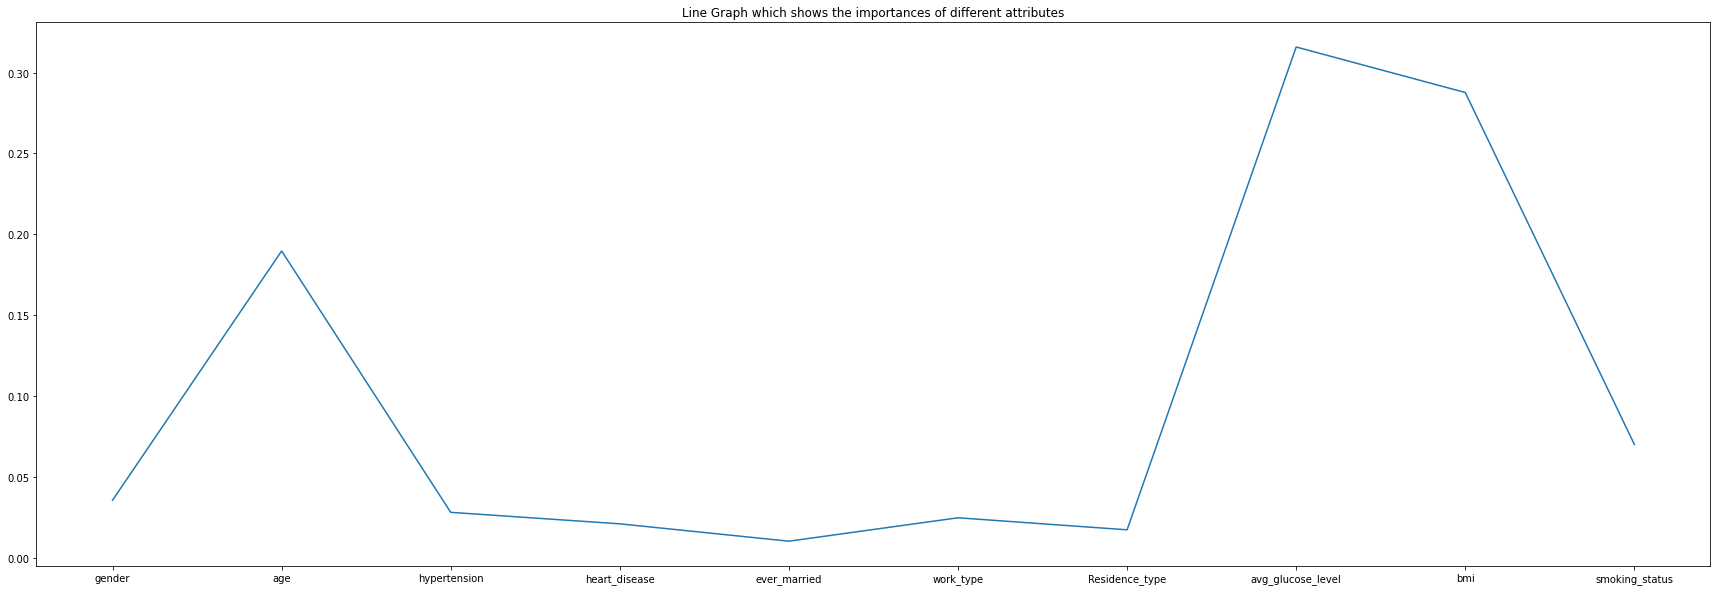

In [33]:
plt.figure(figsize=(30,10))
plt.plot(X.columns,dt.feature_importances_)
plt.title("Line Graph which shows the importances of different attributes")

In [34]:
Y_predict=dt.predict(x_test_std)

In [35]:
Y_test[:10]

955     0
1834    0
2472    0
2335    0
560     0
2724    0
2538    0
1935    0
2208    0
1898    0
Name: stroke, dtype: int64

In [36]:
from sklearn.metrics import accuracy_score

In [58]:
das=accuracy_score(Y_test,Y_predict)

In [38]:
from sklearn.linear_model  import LogisticRegression
lr=LogisticRegression()


In [39]:
lr.fit(x_train_std,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
lr_y_predict=lr.predict(x_test_std)



In [41]:
accuracy_score(Y_test,lr_y_predict)

0.9540117416829745

In [45]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score
confusion_matrix(Y_test,lr_y_predict)

array([[975,   0],
       [ 47,   0]])


##Logistic REGRESSION





In [50]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train_std,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
lr_y_predict=lr.predict(x_test_std)

In [59]:
las=accuracy_score(Y_test,lr_y_predict)

In [92]:
print(las)

0.9540117416829745


##***KNN***

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train_std,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [56]:
k_y_predict=knn.predict(x_test_std)

In [61]:
kas=accuracy_score(Y_test,k_y_predict)

In [63]:
print("Logistic Regression  "+str(las) )
print("Decision Tree  "+str(das))
print("KNN "+str(kas))

Logistic Regression  0.9540117416829745
Decision Tree  0.901174168297456
KNN 0.9510763209393346


In [69]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train_std,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [70]:
rn_predict=rf.predict(x_test_std)

In [73]:
rfas=accuracy_score(Y_test,rn_predict )

# SVM

In [75]:
from sklearn.svm import SVC

In [77]:
sv=SVC()
sv.fit(x_train_std,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [80]:
svPredict=sv.predict(x_test_std)

In [83]:
svas=accuracy_score(Y_test,svPredict)

In [82]:
print(las)

0.9540117416829745


Text(0.5, 1.0, 'Difference between the performances of the different algorithms')

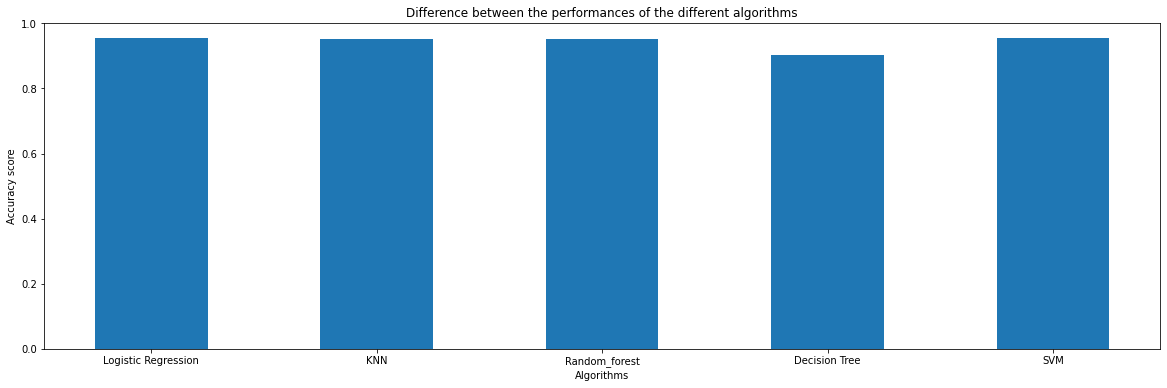

In [91]:
plt.figure(figsize=(20,6))
plt.bar(["Logistic Regression","KNN","Random_forest","Decision Tree","SVM"],[las,kas,rfas,das,svas],width=0.5)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
plt.title("Difference between the performances of the different algorithms")

In [96]:
import pickle
filename='\content\drive\MyDrive\TrainedModels\finalized_model_lr.sav'
pickle.dump(lr,open(filename,'wb'))